# Business understanding

In the telecommunications sector customer retention is a very sensitive role. There must be sincere monitoring of the customers behaviours constantly and establish their cause. Failure to which might lead to churning of customers due to different reasons. This not only leads to a considerable loss to  the stakeholders but also tarnishes the reputation of the company at large.SyriaTel, a Telecommunicatiions company , aims to improve their services through predictive modelling so as to prevent (or minimize) chances of future customer diversion from their services.

# b) Problem statement


SyriaTel is in constant worry of whether the customer will churn or not. This problem has lead to them unable to make stable and precise decision on the customers that visit, additionally to maintain the already present customers

# c) Metric of Success

The model will be counted successful if it can predict accurately whether the customer is likely to churn or not based on their usage of Time spent on using the line as well as the charges accrued to them 

# d) Main Objective

i) Create a model to predict the likelihood of a customer leaving the company’s services. This will help the company     improve its ability to keep customers and stay competitive in the communications industry.

ii) Determine factors that have a higer effect on customer churning.

iii)Build different models to evaluate the best model.

# Data Understanding

In [103]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve,roc_auc_score, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
#from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from scipy import stats
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.svm import SVC

In [104]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')


In [105]:
 #data description
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [106]:
df = df.drop(columns = ['phone number','account length','area code','state'])


In [107]:
df['customer service calls'].unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8], dtype=int64)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   international plan      3333 non-null   object 
 1   voice mail plan         3333 non-null   object 
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total day charge        3333 non-null   float64
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total eve charge        3333 non-null   float64
 9   total night minutes     3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total night charge      3333 non-null   float64
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  total intl charge       3333 non-null   

In [109]:
d =pd.DataFrame(df.describe())
print(d)

       number vmail messages  total day minutes  total day calls  \
count            3333.000000        3333.000000      3333.000000   
mean                8.099010         179.775098       100.435644   
std                13.688365          54.467389        20.069084   
min                 0.000000           0.000000         0.000000   
25%                 0.000000         143.700000        87.000000   
50%                 0.000000         179.400000       101.000000   
75%                20.000000         216.400000       114.000000   
max                51.000000         350.800000       165.000000   

       total day charge  total eve minutes  total eve calls  total eve charge  \
count       3333.000000        3333.000000      3333.000000       3333.000000   
mean          30.562307         200.980348       100.114311         17.083540   
std            9.259435          50.713844        19.922625          4.310668   
min            0.000000           0.000000         0.000000    

In [110]:
df.shape

(3333, 17)

The dataset contains 3333 rows and 17 columns

In [111]:
df.isnull().sum()

international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The dataset does not have any missing values. Some of the feature columns are in integer and float datatypes. While the rest are in object. The target is in boolean.

# Exploratory Data Analysis

Distribution of the churn column

In [112]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

The number of customers who stopped using services from SyriaTel according to the DataSet are 483 while those who did not divert are 2850.

Text(0.5, 0, 'Customers')

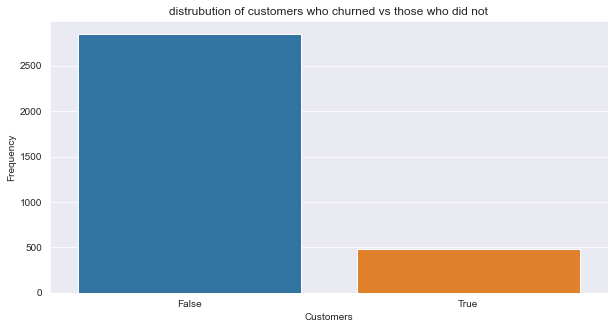

In [113]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'churn',data = df)
plt.title('distrubution of customers who churned vs those who did not')
plt.ylabel('Frequency')
plt.xlabel('Customers')

In [114]:
target= df['churn']

# Univariate analysis for numerical columns

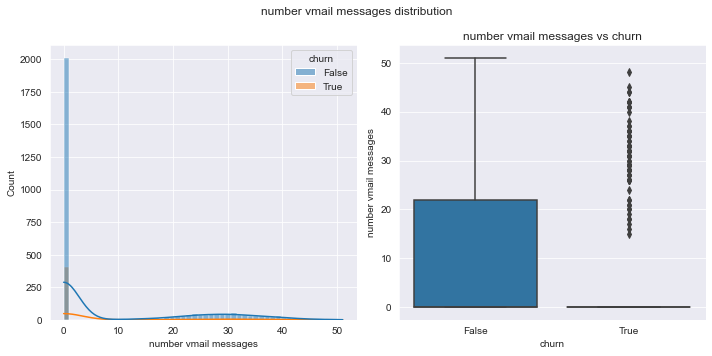

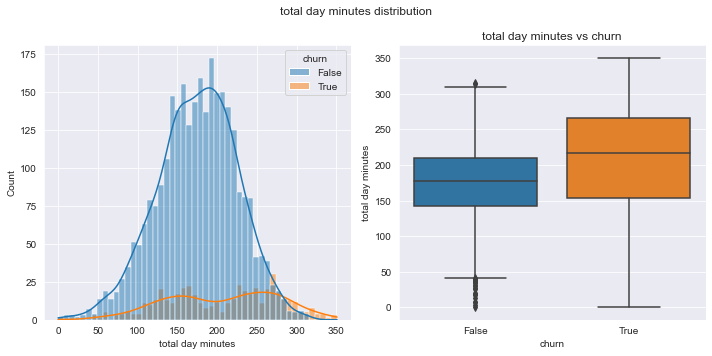

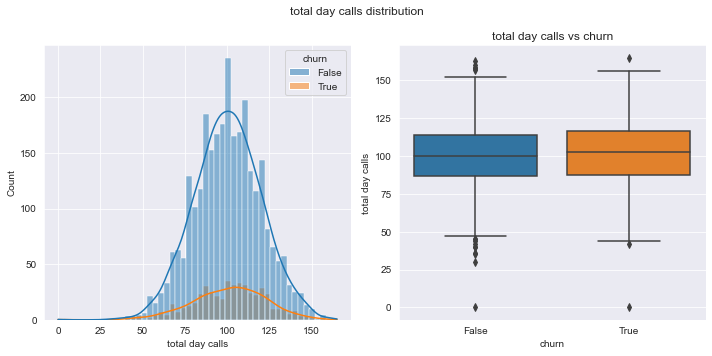

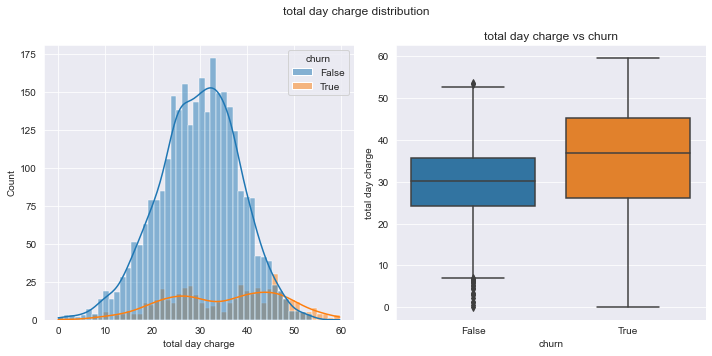

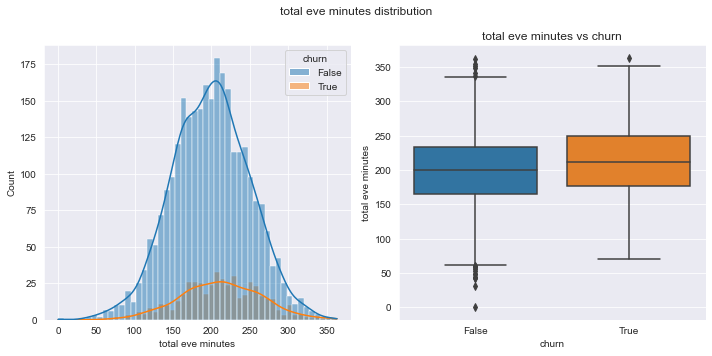

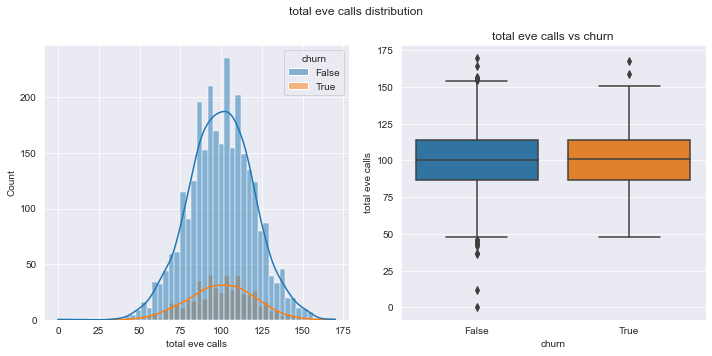

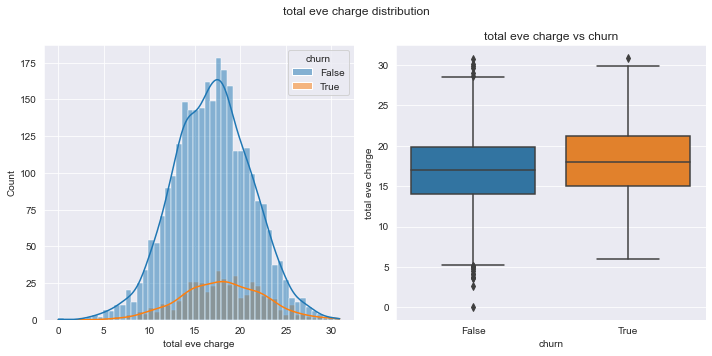

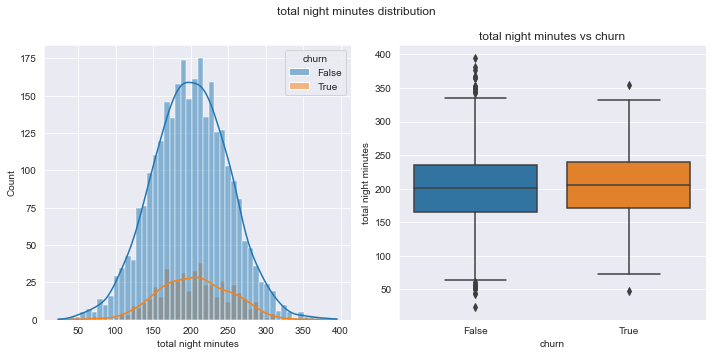

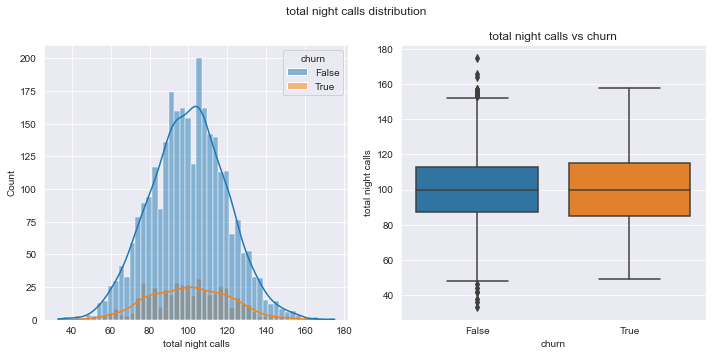

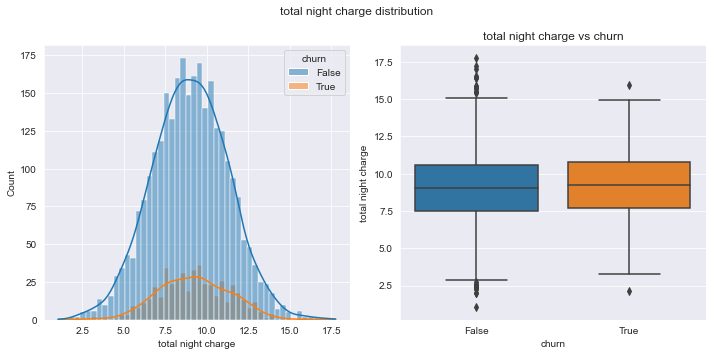

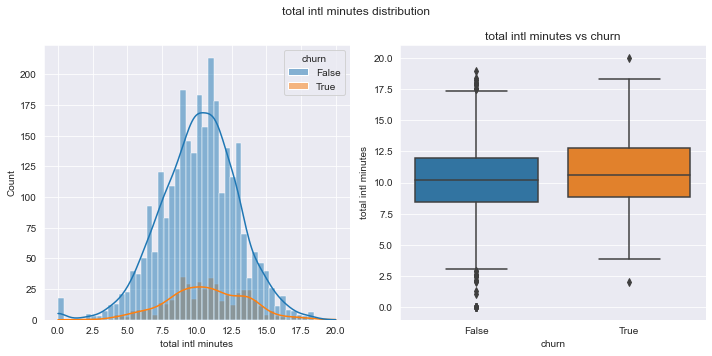

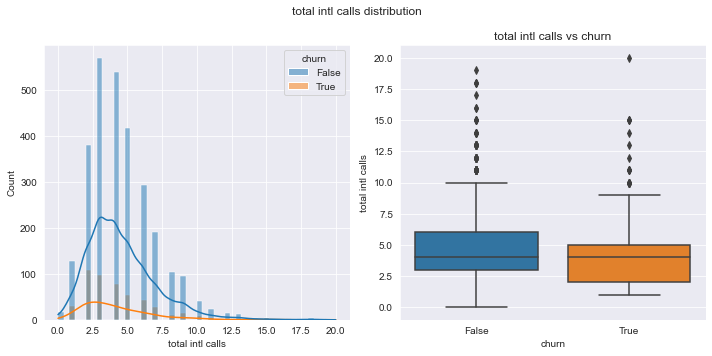

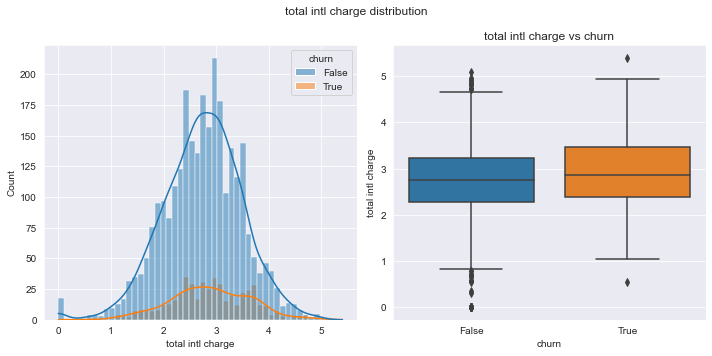

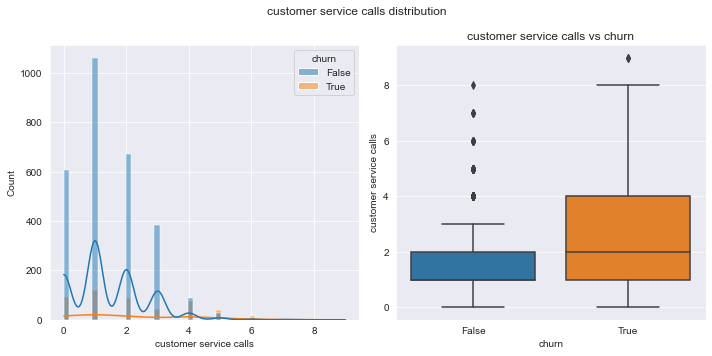

In [115]:

%matplotlib inline    
cols = df.select_dtypes(include=['number']).columns.tolist()
for col in cols:
            figsize=(10,5)
           
            fig, axes = plt.subplots(1,2, figsize=figsize)
            
            sns.histplot(data=df, x=df[col], ax=axes[0], hue=df['churn'], bins=50, kde=True)
            plt.suptitle(f'{col} distribution')
            sns.boxplot(x=df['churn'], y=df[col], ax=axes[1])
            plt.title(f'{col} vs churn')
            plt.xlabel('churn')
            plt.ylabel(col)
            plt.tight_layout()
            plt.show()


people with a higher day charge tend to churn more

people with less international calls churn more

people with less customer service calls churn more

# Univariate analysis for Categorical Variables

In [116]:
categorical_columns = ['international plan','voice mail plan']

Counts for international plan:
no     3010
yes     323
Name: international plan, dtype: int64



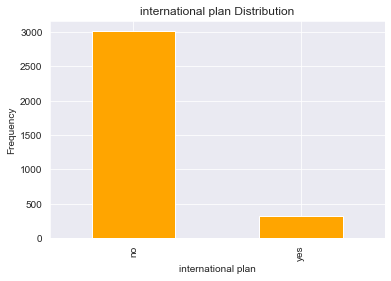

Counts for voice mail plan:
no     2411
yes     922
Name: voice mail plan, dtype: int64



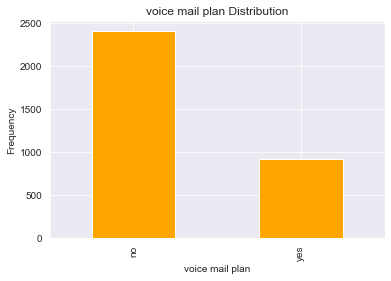

In [117]:
for column in categorical_columns:
    counts = df[column].value_counts()
    print(f"Counts for {column}:")
    print(counts)
    print()

    # Bar plot for each categorical column
    plt.figure()
    counts.plot(kind='bar', color='orange')
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# Bivariate Analysis for categorical columns

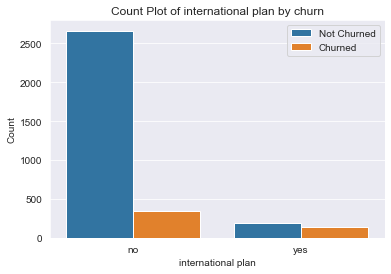

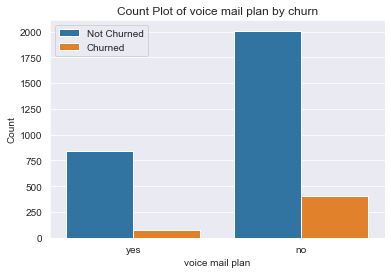

In [118]:
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=column, hue='churn')
    plt.title(f'Count Plot of {column} by churn', fontsize=12)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(labels=['Not Churned', 'Churned'])
    plt.show()

Most of the customers have subscribed to the international plan. Out of those, a considerable number has churned from using SyriaTel.

The majority of the customers have an active voice mail plan. A considerable number of people with this plan activated have also ceased using SyriaTel.

In [119]:
for column in categorical_columns:
    print(f'Churning Percentage in {column}:')
    
    # Calculate the percentage of each churn category within the column
    churn_percentage = df.groupby(column)['churn'].value_counts(normalize=True).unstack() * 100
    
    print(churn_percentage)
    print('\n')

Churning Percentage in international plan:
churn                   False      True 
international plan                      
no                  88.504983  11.495017
yes                 57.585139  42.414861


Churning Percentage in voice mail plan:
churn                False      True 
voice mail plan                      
no               83.284944  16.715056
yes              91.323210   8.676790




In [120]:
# transform the categorical variables into numerical datatypes
variables_to_encode = ['international plan','voice mail plan']
df = pd.get_dummies(df,columns = variables_to_encode,drop_first = True,dtype = int)

df['churn'] = df['churn'].astype(int)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number vmail messages   3333 non-null   int64  
 1   total day minutes       3333 non-null   float64
 2   total day calls         3333 non-null   int64  
 3   total day charge        3333 non-null   float64
 4   total eve minutes       3333 non-null   float64
 5   total eve calls         3333 non-null   int64  
 6   total eve charge        3333 non-null   float64
 7   total night minutes     3333 non-null   float64
 8   total night calls       3333 non-null   int64  
 9   total night charge      3333 non-null   float64
 10  total intl minutes      3333 non-null   float64
 11  total intl calls        3333 non-null   int64  
 12  total intl charge       3333 non-null   float64
 13  customer service calls  3333 non-null   int64  
 14  churn                   3333 non-null   

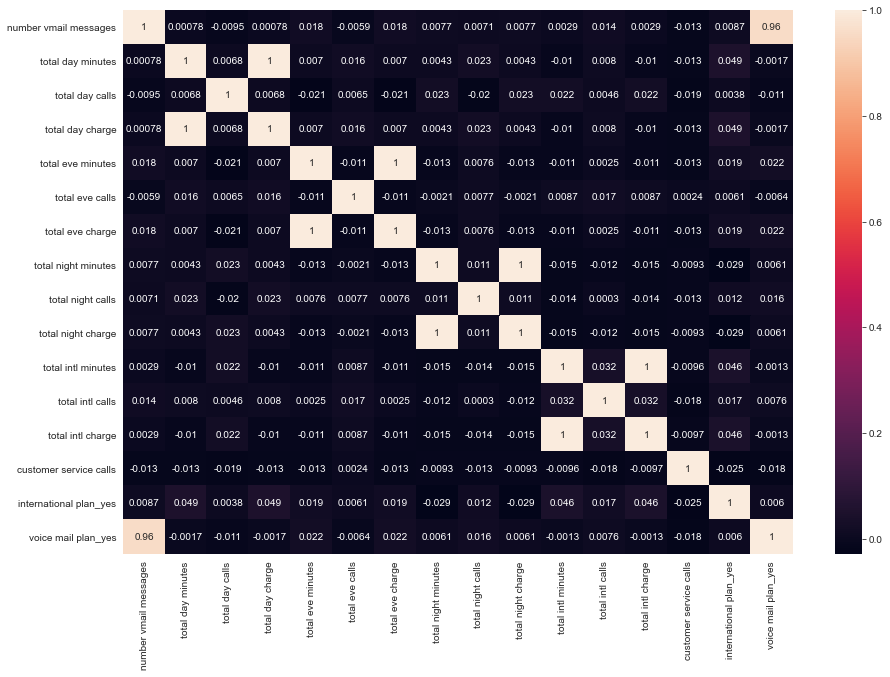

In [122]:
# Create a correlation Matrix
df_corr = df.drop(columns = 'churn')
corr_matrix = df_corr.corr()
#fit a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot = True)

plt.show()

In [123]:
#Some of the variables are highly correlated with each other so we drop on of each the correlated variables
# Set threshold for correlation
threshold = 0.8

# Find pairs of highly correlated features
corr_pairs = corr_matrix.unstack().sort_values(kind="heap", ascending=False)
high_corr_pairs = [(i, j) for i, j in corr_pairs.index if i != j and abs(corr_pairs[i, j]) > threshold]

# Print highly correlated pairs
print("Highly correlated pairs (threshold = 0.8):")
for pair in high_corr_pairs:
    print(pair, corr_pairs[pair])

# Drop one of the variables from each pair
for i, j in high_corr_pairs:
    if j in df.columns:
        df.drop(j, axis=1, inplace=True)

print("\nDataFrame after removing highly correlated variables:")
print(df)


Highly correlated pairs (threshold = 0.8):
('total day minutes', 'total day charge') 0.999999952190397
('total day charge', 'total day minutes') 0.999999952190397
('total eve minutes', 'total eve charge') 0.9999997760198517
('total eve charge', 'total eve minutes') 0.9999997760198517
('total night charge', 'total night minutes') 0.99999921487588
('total night minutes', 'total night charge') 0.99999921487588
('total intl minutes', 'total intl charge') 0.9999927417510258
('total intl charge', 'total intl minutes') 0.9999927417510258
('number vmail messages', 'voice mail plan_yes') 0.9569266420696362
('voice mail plan_yes', 'number vmail messages') 0.9569266420696362

DataFrame after removing highly correlated variables:
      total day calls  total eve calls  total night calls  total intl calls  \
0                 110               99                 91                 3   
1                 123              103                103                 3   
2                 114              

<AxesSubplot:>

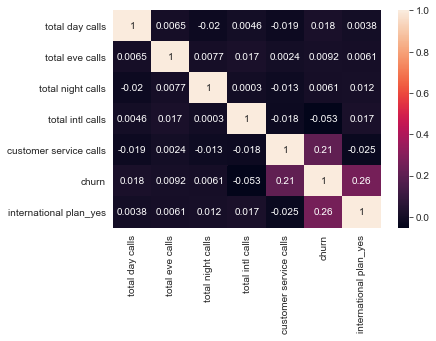

In [124]:
new_corr = df.corr()
sns.heatmap(new_corr,annot = True)

In [125]:
# Calculate z-scores for each column
z_scores = np.abs(zscore(df))

# Define a threshold for outliers
threshold = 4

# Create a boolean mask indicating outliers
outlier_mask = (z_scores > threshold).any(axis=1)

# Remove outliers from the dataset
df_clean= df[~outlier_mask]

In [126]:
df_clean.head()

,total day calls,total eve calls,total night calls,total intl calls,customer service calls,churn,international plan_yes
0,110,99,91,3,1,0,0
1,123,103,103,3,1,0,0
2,114,110,104,5,0,0,0
3,71,88,89,7,2,0,1
4,113,122,121,3,3,0,1


In [127]:
# Split the dataset
# Define the X and the y  variable
X = df_clean.drop(columns=['churn']) 
y = df_clean['churn'] 

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Standerdize the features
scaler = StandardScaler()

# fit and transform the training dataset
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [128]:
#Instantiate the models to first check for overfitting and underfitting
models = [
      ('K Nearest Neighbors', KNeighborsClassifier()),
      ('Xgboost', XGBClassifier()),
      ('Logistic Regression', LogisticRegression()),
      ('Random Forest', RandomForestClassifier()),
      ('SVC',SVC())
]


scores = []
for name, model in models:
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    scores.append((name, train_score, test_score))
# Display Model Performance
for name, train_score, test_score in scores:
    print(f'{name}:\n Train Score = {train_score*100:.4f}\n Test Score = {test_score*100:.4f}\n')

K Nearest Neighbors:
 Train Score = 89.5758
 Test Score = 86.5617

Xgboost:
 Train Score = 97.7374
 Test Score = 87.5303

Logistic Regression:
 Train Score = 86.1414
 Test Score = 85.2300

Random Forest:
 Train Score = 100.0000
 Test Score = 87.5303

SVC:
 Train Score = 88.8081
 Test Score = 86.3196



## RandomForestClassifier(using a pipeline)

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Instantiate the pipeline
pipe = Pipeline([
    ('forest', RandomForestClassifier(random_state=123))
])

# Define the parameter grid
grid = {
    'forest__max_depth': [None, 2, 6, 10],
    'forest__min_samples_split': [5, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=pipe,
                           param_grid=grid,
                           scoring='accuracy',
                           cv=5)

# Fit the grid search
grid_search.fit(X_train, y_train)

#predict the data
y_pred = grid_search.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

#calculate the score
grid_search.score(X_train,y_train)
grid_search.score(X_test,y_test)

print("\nTrain score:", train_score*100)
print("Test score:", test_score*100)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Predict on the test data
#y_pred = grid_search.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy: 87.17

Train score: 88.8080808080808
Test score: 86.31961259079904
Best parameters found:  {'forest__max_depth': 6, 'forest__min_samples_split': 5}
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       699
           1       0.86      0.20      0.32       127

    accuracy                           0.87       826
   macro avg       0.87      0.60      0.62       826
weighted avg       0.87      0.87      0.84       826



In [130]:
# Measure class imbalance
class_ratio = y.value_counts()[1] / y.value_counts()[0]
print(f"Class ratio (Churned to Not Churned): {class_ratio:.4f}")

Class ratio (Churned to Not Churned): 0.1660


# 2. XGBoost Classifier

In [131]:
# Create and fit the XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = xgb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")

# Print classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Accuracy: 87.53

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       699
           1       0.72      0.31      0.43       127

    accuracy                           0.88       826
   macro avg       0.80      0.64      0.68       826
weighted avg       0.86      0.88      0.85       826



In [132]:
# Check class distribution in y_train and y_test
print("Class distribution in y_train:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True))

Class distribution in y_train:
0    0.861414
1    0.138586
Name: churn, dtype: float64

Class distribution in y_test:
0    0.846247
1    0.153753
Name: churn, dtype: float64


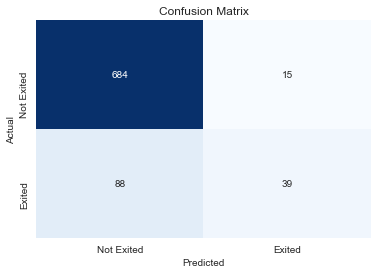

In [133]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not Exited", "Exited"],
            yticklabels=["Not Exited", "Exited"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<Figure size 720x432 with 0 Axes>

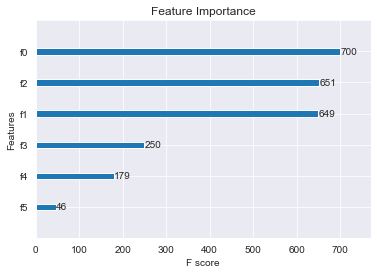

In [134]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight')
plt.title("Feature Importance")
plt.show()

## Logistic Regression

In [135]:

# Define the pipeline
pipeline = Pipeline([
    ('classifier', LogisticRegression()) # Final estimator: LogisticRegression
])

# Define the parameter grid
param_grid = {
    'classifier__C': [0.1, 1, 10],       # Regularization parameter
    'classifier__solver': ['liblinear', 'lbfgs'] # Algorithm to use in the optimization problem
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5)

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

# Predict on the test data using the best model found by grid search
y_pred = grid_search.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Best parameters
print("Best parameters found:", grid_search.best_params_)


Accuracy: 0.851089588377724
Best parameters found: {'classifier__C': 0.1, 'classifier__solver': 'lbfgs'}


## Support vector machine

In [136]:
# Define the pipeline
pipeline_svc = Pipeline([
    ('classifier', SVC())  # Final estimator: SVC
])

# Define the parameter grid
param_grid_svc = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

# Create the GridSearchCV object
grid_search_svc = GridSearchCV(estimator=pipeline_svc,
                               param_grid=param_grid_svc,
                               scoring='accuracy',
                               cv=5)

# Fit the grid search
grid_search_svc.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_svc = grid_search_svc.predict(X_test_scaled)

# Calculate accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("SVC Accuracy:", accuracy_svc)
print(f'Tuned SVM accuracy is: {grid_search.score(X_test, y_test)}')


              precision    recall  f1-score   support

           0       0.86      0.99      0.92       699
           1       0.59      0.10      0.17       127

    accuracy                           0.85       826
   macro avg       0.72      0.54      0.55       826
weighted avg       0.82      0.85      0.80       826

SVC Accuracy: 0.8631961259079903
Tuned SVM accuracy is: 0.15375302663438256


# Observations

In this project, we focused on SyriaTel's data regarding customer churn. Customer churn has always negatively impacted the company's profits and reputation. Our task was to develop a predictive model using SyriaTel's customer churn records. This model helps determine the likelihood of a customer leaving, allowing the company to take steps to prevent churn by improving its services.

We analyzed the historical churn rate, customer communication behaviors, time spent on calls, amount spent, and active subscriptions.

All the models showed good performance, with the RandomForestClassifier achieving the highest accuracy of 87.17%.

# Recommendations

1. **Feedback Loop**: Regularly ask customers, especially those who left, why they decided to leave. Their answers can help the company improve its services and make better decisions.

2. **Timely Engagement**: Reach out to customers who are likely to leave with special offers, rewards, or support to solve their issues and improve their experience with the company.

3. **Personalized Customer Experience**: Use the information from the model to give customers a more personal experience. By understanding what they like and need, the company can offer products and services that better suit them, which helps keep them happy and reduces the chance of them leaving.